# Logistic Regression


선형 회귀로 풀리지 않는 문제 -> 독립변수와 종속변수가 비선형 관계인 경우

공부시간과 합격률의 관계 -> 연속적으로 변하는 공부시간의 결과에 대해 “합격했다” 또는
“합격하지 않았다?”의 결과만 필요

분류방법 1 -> 선형분류

더 나은 분류 방법은?

- 1958년 D.R.Cox가 제안한 확률 모델로 <font  color=blue>독립변수의 선형 결합을 이용하여 종속변수 (사건의 발생 가능성)을 예측</font>하는데 사용되는 통계 기법 -> 종속 변수가 <font  color=blue>범주형 데이터를 대상</font> -> 분류

- 선형 회귀는 독립변수 x가 변화할 때 종속변수 y가 어떻게 변하는 지 예측하는 것
- 선형 회귀에서 x와 y의 범위 : [-∞, ∞]

- 연속적으로 변하는 2개의 결과만을 확인하는 경우 -> 조사회수가 많아지면 종속 변수 y는 확률로 표현됨 -> 독립변수의 범위는 [-∞, ∞], 종속변수의 범위는 [0, 1] -> 선형회귀를 적용하면 종속변수의 값 범위를 넘어가는 문제가 발생 -> 예측정확도 하락 -> <font  color=blue>로지스틱 모형</font> 적용

오즈 (odds) : 성공확률이 실패확률에 비해 몇 배 높은가를 나타냄, 범위 [0, 1]

> \\( odds=\frac { p(y) }{ 1-p(y) }  \\)

로짓 변환 : 오즈에 자연로그를 취한 것으로 입력 값의 범위가 [0, 1] 일 때 출력 값의 범위를 [-∞, ∞]
로 조정

> \\( \log _{ e } {\frac { p(y) }{ 1-p(y) }} =\ln { \frac { p(y) }{ 1-p(y) }  }  \\)

로지스틱 함수 (sigmoid 함수) : 독립변수 x가 어느 숫자이든 상관없이 종속 변수의 값의 범위가 항
상 [0, 1] 범위에 있도록 함

> \\( \ln { \frac { p(y) }{ 1-p(y) }  }  = z  \\) <br>

> -> \\(  \frac { p(y) }{ 1-p(y) }   = { e }^{ z  }  \\) <br>

> -> \\( \begin{align}
p & = \frac {  { e }^{ z  }  }{ 1 +  { e }^{ z  }  } \\
& = \frac {  1  }{ 1 +  { e }^{(- z)  }  } 
\end{align} \\)

#### 로지스틱 회귀 (Logistic Regression)

- 간단하면서도 파라미터의 수가 적어서 빠르게 예측 -> 다른 알고리즘과의 비교 기준점으로 사용
- 로지스틱 함수를 사용하여 확률을 추정하며 2 클래스 및 다중 클래스 분류를 위한 강력한 통계 방법으로 빠르고 단순
- 직선 대신 S 모양 곡선을 사용한다는 사실 때문에 데이터를 그룹으로 나누는 데 적합
- 용도 : 신용 점수, 마케팅 캠페인의 성공률 측정, 특정 제품의 매출 예측률, 특정 날에 지진이 발생할 확률



- 선형 회귀 방식을 분류에 적용한 알고리즘 (선형 회귀 계열)

- Linear Regression와 매우 비슷하지만 가중치(w) 합을 사용하는 대신 예측한 값을 임계치 0 과 비교
- 계산한 값이 0보다 작은 클래스는 -1, 0보다 크면 +1이라고 예측(분류)

- 이 규칙은 Classifier에 쓰이는 모든 Linear model에서 동일
- 가장 널리 알려진 두 개의 linear classifier algorithm
  1. Logistic Regression
  1. Support Vector Classifier의 Linear SVC

[LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
```
LogisticRegression(penalty, dual, tol, C, fit_intercept, intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, warm_start, n_jobs, l1_ratio)
```
- <font  color=blue> penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2 </font>
- dual : 이중 또는 초기 공식
- tol : 정밀도
- <font  color=blue> C : 규제 강도 </font>
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- <font  color=blue> l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) </font>

#### LogisticRegression 실습 01

학습시간 대비 합격분류 적용


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 학습시간 대비 합격 데이터
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [3]:
# X
# np.hstack 열 추가, vstack 행 추가
X = np.hstack( (pass_time, fail_time) ) # 튜플 순서 중요
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [4]:
# y : 튜플 순서대로 1, 0
y1 = [1] * len(pass_time) # 합격 1
y0 = [0] * len(fail_time) # 불합격 0
y = np.hstack( (y1, y0) )
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0, 0.5, 'Pass rate')

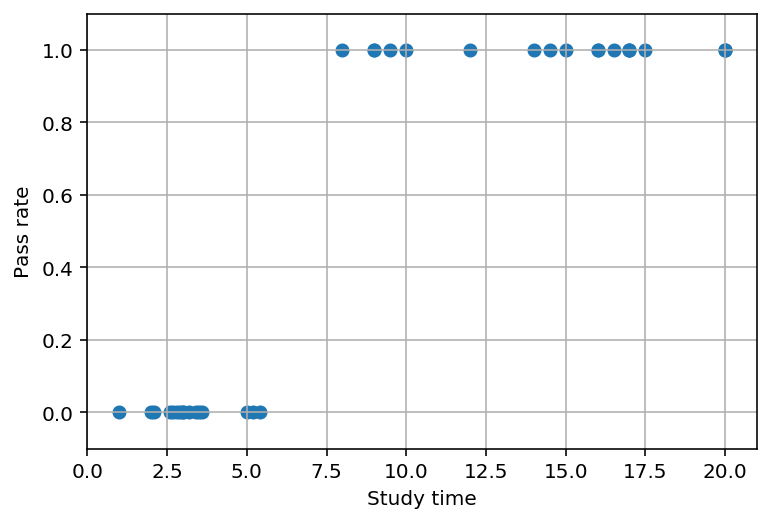

In [5]:
# 시각화
plt.scatter(X, y)
plt.grid(True)

plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")

In [6]:
# 모델학습
model = LogisticRegression()
model.fit(X.reshape(-1, 1), y) # X가 1차원이라 2차원으로 reshape

model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [7]:
# 예측 분류
model.predict( [[6.9]] )  # 2차원으로 넣어줘야 함

array([0])

In [8]:
# 예측 확률
model.predict_proba( [[6.9]] )

array([[0.50294437, 0.49705563]])

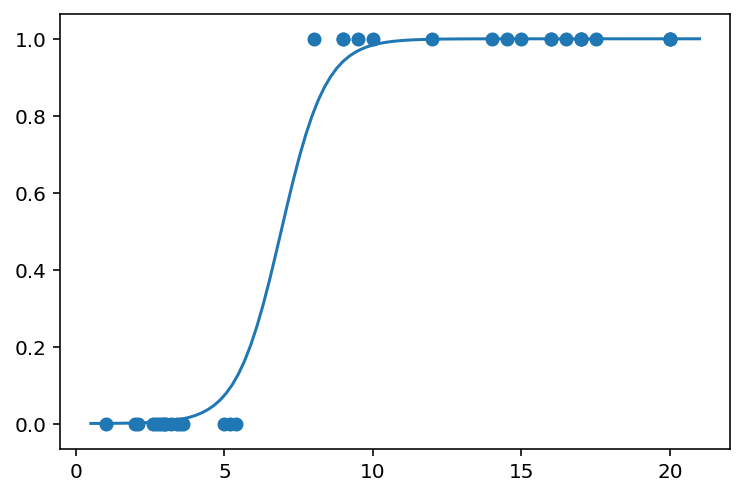

In [9]:
# 결과 시각화
def logreg(z):
    return 1 / (1 + np.exp(-z))

plt.scatter(X, y)

xx = np.linspace(0.5, 21, 100)
yy = logreg( model.coef_ * xx + model.intercept_ )
yy[0]
plt.plot(xx, yy[0])

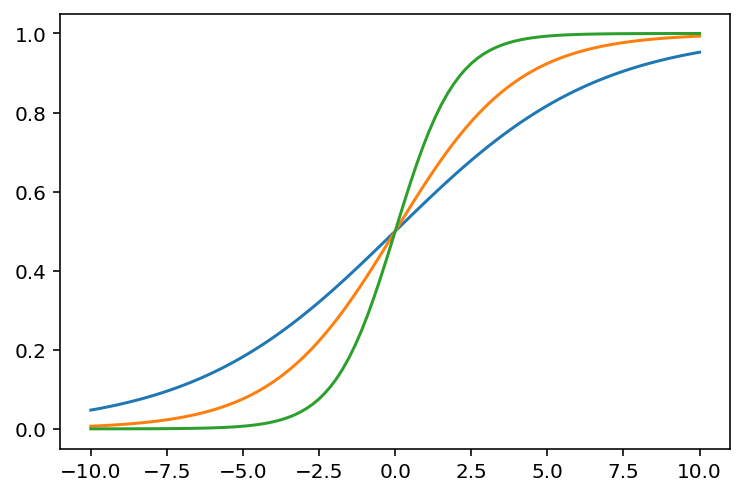

In [10]:
# 가중치 이동
# W(a)값이 작을때 -> 클 때
def logreg(z):
    return 1 / (1 + np.exp(-z))

W_list = [0.3, 0.5, 1] # W가 커질수록 가파른 경사
b_list = [0]
xx = np.linspace(-10, 10, 100)
for W in W_list:
    for b in b_list:
        yy = logreg( W * xx + b )
        plt.plot(xx, yy)

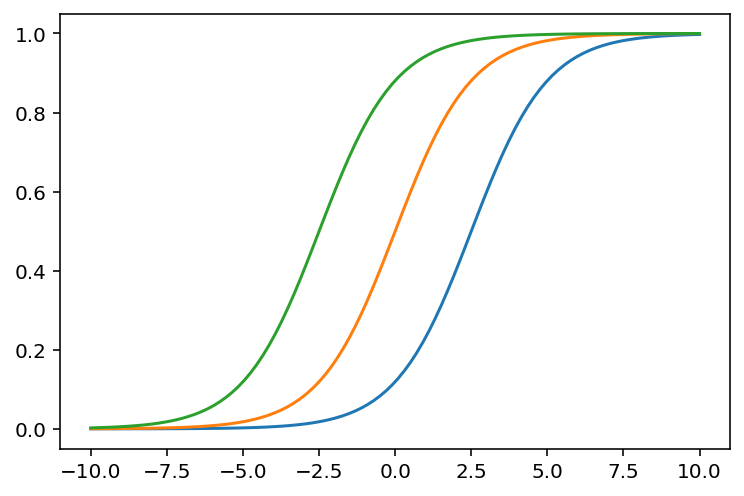

In [11]:
# 절편이동
# b값이 작을때 -> 클 때
def logreg(z):
    return 1 / (1 + np.exp(-z))

W_list = [0.8]
b_list = [-2, 0, 2] # b가 커질수록 y축에 가까워짐
xx = np.linspace(-10, 10, 100)
for W in W_list:
    for b in b_list:
        yy = logreg( W * xx + b )
        plt.plot(xx, yy)

#### LogisticRegression 실습 02

forge 데이터 셋을 이용

In [12]:
# !pip install mglearn

In [13]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [14]:
# X, y 데이터 준비
X, y = make_forge()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


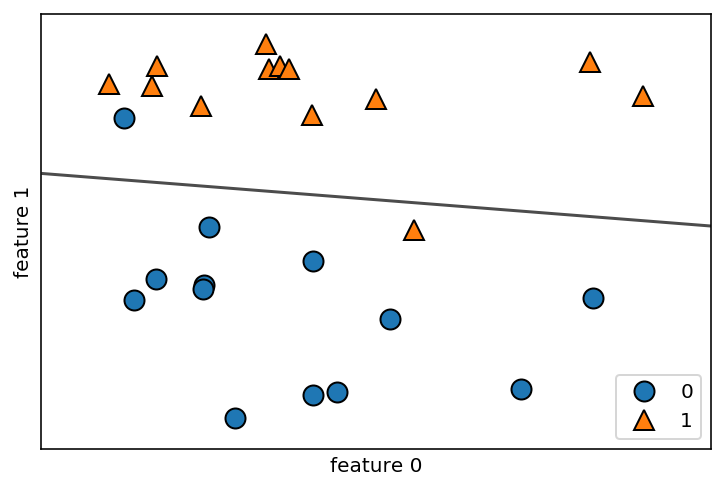

In [15]:
# C 값을 변경해가면서 결정경계가 어떻게 변하는지 확인 : C값을 낮추면 규제 증가, 스코어는 감소
model = LogisticRegression(C=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

plt.xlabel('feature 0')  # 특성0
plt.ylabel('feature 1')  # 특성1

plt.legend(loc=4)
plt.show()

- C의 값이 커지면 규제가 감소 (관여되는 데이터포인트 수 감소) -> 과대적합 감소
- C가 크면 최대한 훈련 세트에 맞추려고 하고 C가 작으면 w가 0에 가까워지도록 만듬
- C가 크면 개개의 데이터 포인를 정확히 분류하려고 하고, C가 작으면 데이터 포인트 중에서 다수에 맞추려고 함

#### LogisticRegression 실습 03

유방암 데이터를 이용한 분석 - 1

In [16]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    random_state=66)
X_train.shape

(426, 30)

In [18]:
# C=100, C=0.01 등으로 변경하면서 학습 점수의 결과를 비교
# 모델생성과 학습
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

# 훈련과 테스트 스코어 비교
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9577464788732394, 0.965034965034965)

규제 매개변수 C 설정을 다르게 하여 학습 시킨 모델의 계수 표시

No handles with labels found to put in legend.


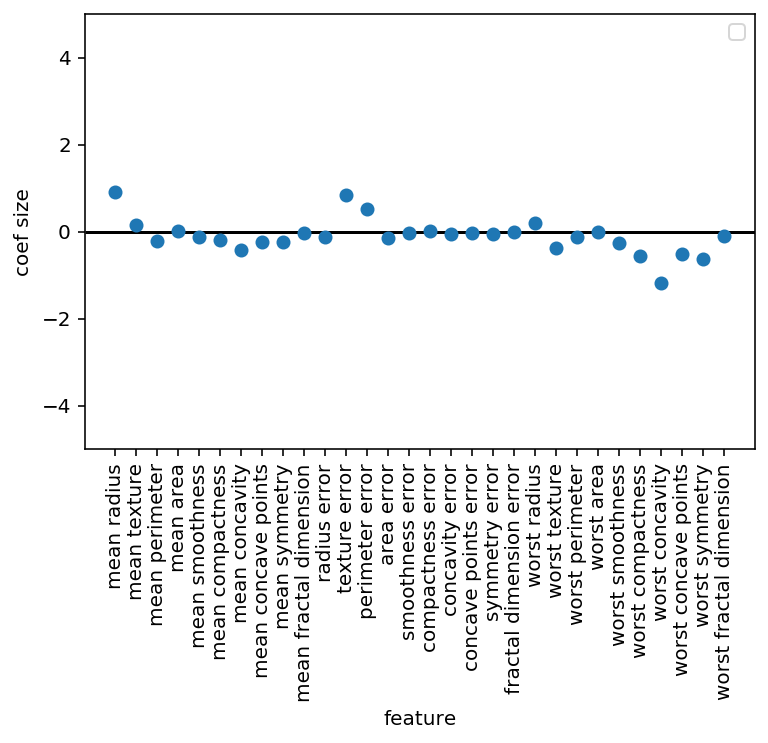

In [19]:
# 다른 C 값의 결과 추가
plt.plot(model.coef_.T, 'o')

plt.xticks( range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])

plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel("coef size")
plt.legend()

- C=1에서 훈련세트와 테스트 세트 양쪽 모두 95% 정확도로 우수한 성능
- 2개의 값이 서로 비슷하여 과소적합일 수 있음 --> 모델의 제약을 더주기 위해 C값을 늘릴 필요가 있음

C를 L1규제로 사용할 경우 분류 정확도와 계수 그래프를 표시

- Regularization에서 모든 특성을 이용할지 일부 특성만을 사용할지 결정하는 주요 parameter는 'penalty'

In [20]:
model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9812206572769953, 0.958041958041958)

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.92
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.90
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.98
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96


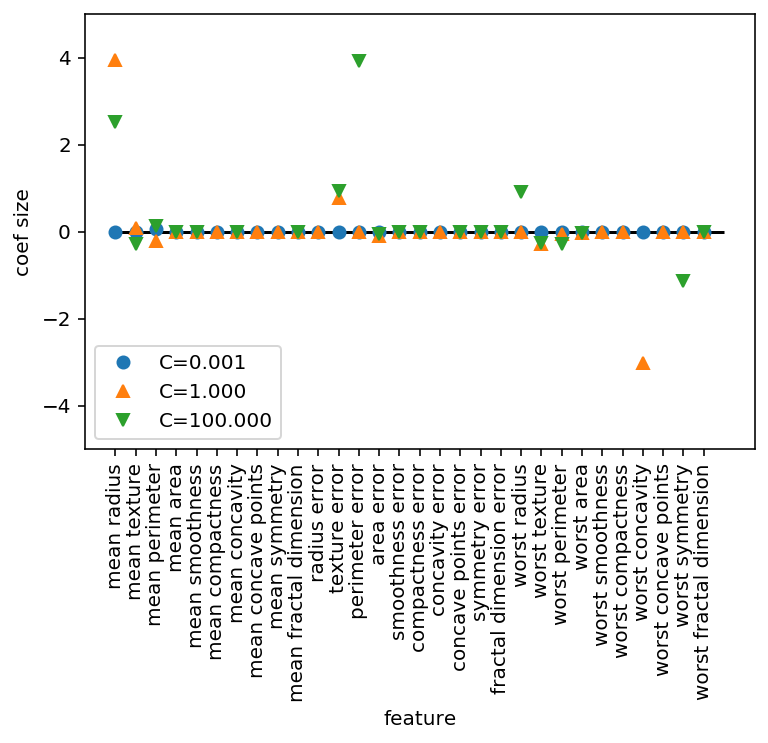

In [21]:
# C 변화에 따른 로지스틱 회귀의 훈련 정확도와 테스트 정확도 비교
for C, marker in zip( [0.001, 1, 100], ['o', '^', 'v'] ):
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=10000)
    model.fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, model.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, model.score(X_test, y_test)))
    plt.plot( model.coef_.T, marker, label='C={:.3f}'.format(C) )
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coef size")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### LogisticRegression 실습 04

와인 데이터를 이용한 분류

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

# 데이터 로드
wine = load_wine()
wine.keys()
wine.feature_names, wine.target_names

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['등급'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [23]:
# X , y
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X.shape, y.shape

# 훈련, 테스트 데이터 나누기.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
model = LogisticRegression(C=0.1, max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9774436090225563, 0.9555555555555556)

#### LogisticRegression 실습 05

wave 데이터를 이용한 다중 분류

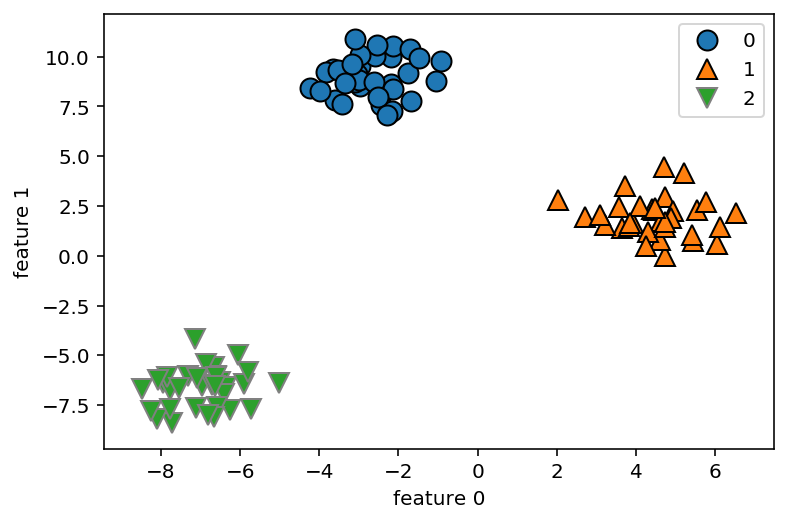

In [25]:
# 데이터 생성 및 시각화
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import mglearn


X, y = make_blobs(random_state=42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend()
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.show()

In [26]:
# 훈련셋 및 테스트셋 분리 및 LogisticRegression 실행
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
# 예측하기
model.predict(X_test)

array([1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2,
       1, 2, 1])

In [28]:
# 평가하기
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 1.0)

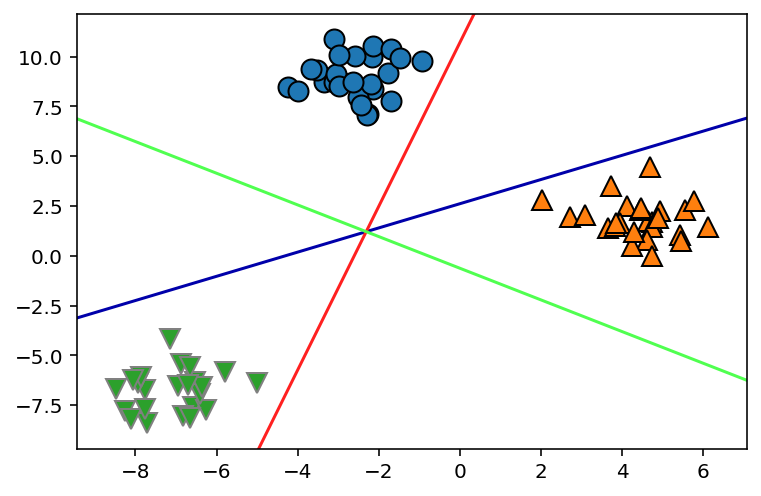

In [29]:
# 실행 결과 시각화
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

xx = np.linspace(-15, 15)

for coef, intercept, color in zip( model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0] * xx + intercept) / coef[1]
    plt.plot(xx, yy, c=color)

#### LogisticRegression 실습 06

붓꽃 데이터 셋을 이용한 다중 분류

In [30]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
# 데이터 분리
# 훈련 데이터를 75%, 테스트 데이터를 25% 선택
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, 2:],
                                                   iris.target,
                                                   random_state=0)

In [32]:
# LogisticRegression 수행
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
# 훈련 스코어와 테스트 스코어 비교
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

In [34]:
# 예측
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

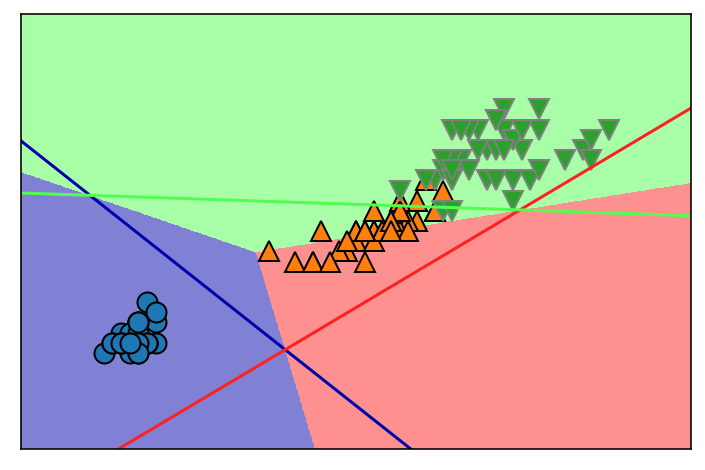

In [35]:
# 다중분류
model = LogisticRegression(C=1, max_iter=100, solver='liblinear')
model.fit(X_train, y_train)

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)

xx = np.linspace(-15, 15)

for coef, intercept, color in zip( model.coef_, model.intercept_, mglearn.cm3.colors):
    yy = -(coef[0] * xx + intercept) / coef[1]
    plt.plot(xx, yy, c=color)

-0.6154002850758337 -0.7111123755447665 2.0505984697322925 [1. 2. 3. 4. 5. 6. 7.]
0.5142542317420794 -1.0620856124060263 -1.0413780716791385 [1. 2. 3. 4. 5. 6. 7.]
0.20345538717737863 1.6194484671880056 -3.6128722533757807 [1. 2. 3. 4. 5. 6. 7.]


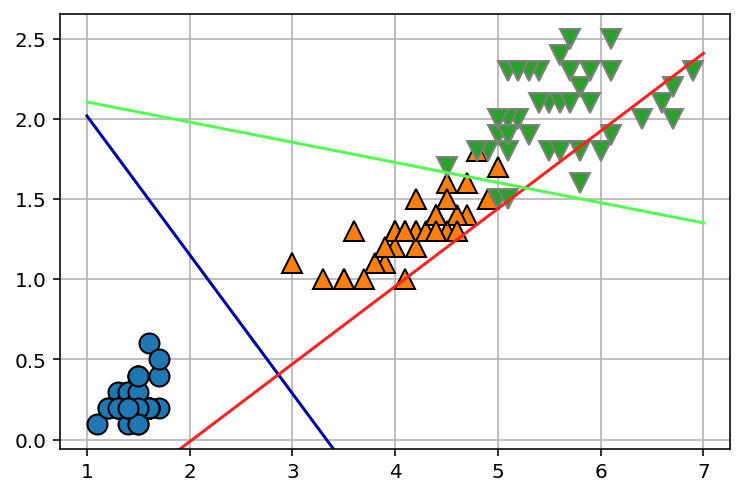

In [36]:
# LinearSVC 비교
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
# mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)

xx = np.linspace(1, 7, 7)

for coef, intercept, color in zip( model.coef_, model.intercept_, mglearn.cm3.colors):
    print(coef[0], coef[1], intercept, xx)
    yy = -(coef[0] * xx + intercept) / coef[1]
    plt.plot(xx, yy, c=color)

plt.grid(True)

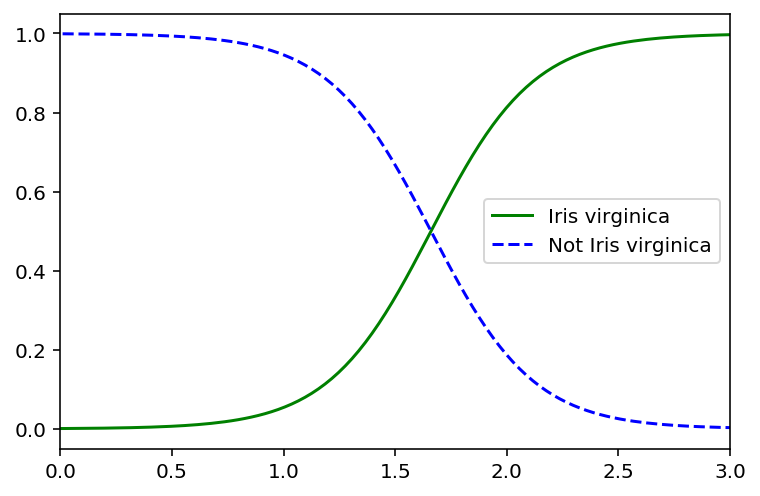

In [37]:
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
iris = load_iris()

X = iris.data[:, 3:]  # 꽃잎의 너비
y = (iris.target == 2).astype(np.int)

model = LogisticRegression().fit(X, y)

xx = np.linspace(-15, 15, 1000).reshape(-1,1)
y_proba = model.predict_proba(xx)
plt.plot(xx, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(xx, y_proba[:,0], 'b--', label='Not Iris virginica')

plt.xlim(0, 3)
plt.legend()
# plt.xlabel('꾳잎 너비(cm)')
# plt.ylabel('확률')

#### Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)
- 학습속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

#### 소프트맥스

- 다항 로지스틱스

> \\( { y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }  \\)

In [38]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)             # 지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a)     # 지수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a         # 확률
print(y)
print( np.sum(y) )

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


In [39]:
def softmax(a):
    c = np.max(a)             # 오버플로 대책
    exp_a = np.exp(a - c)     # 지수함수
    sum_exp_a = np.sum(exp_a) # 지수의 합
    y = exp_a / sum_exp_a     # 확률
    return y

a = np.array( [0.3, 2.9, 4.0] )
y = softmax(a)
print(y)
print( np.sum(y) )

# 오버플로 발생 계산안됨!
a = np.array( [1010, 1000, 990] )
# softmax(a)

# 오버플로 대책
# 가장 큰 수와의 차이값을 이용
c = np.max(a)
print(a - c)
y = np.exp(a - c) / np.sum( np.exp(a - c) )
print(y)
print( np.sum(y) )

[0.01821127 0.24519181 0.73659691]
1.0
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0
